In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [5]:
def hough_line(img):

    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    print(img.shape)
    width, height = img.shape
    diag_len = np.ceil(np.sqrt(width * width + height * height))   # max_dist
    rhos = np.linspace(-diag_len, diag_len, diag_len * 2.0)

    cos_t = np.cos(thetas)
    sin_t = np.sin(thetas)
    num_thetas = len(thetas)

    accumulator = np.zeros((2 * int(diag_len), num_thetas), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

    for i in range(len(x_idxs)):
        x = x_idxs[i]
#         y = y_idxs[i]
        for j in range (len(y_idxs)):
            y = y_idxs[j]

            for t_idx in range(num_thetas):
                rho = round(x * cos_t[t_idx] + y * sin_t[t_idx]) + diag_len
                accumulator[int(rho), t_idx] += 1
    return accumulator, thetas, rhos

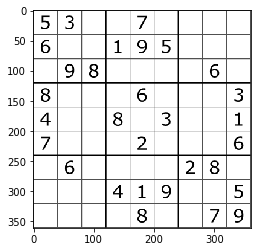

In [6]:
image = cv2.imread('sudoku.png')
plt.imshow(image)


In [ ]:




gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)


accumulator, thetas, rhos = hough_line(edges)

idx = np.argmax(accumulator)
rho = rhos[int(idx / accumulator.shape[1])]
theta = thetas[int(idx % accumulator.shape[1])]




a = np.cos(theta)
b = np.sin(theta)
x0 = a*rho
y0 = b*rho
x1 = int(x0 + 1000*(-b))
y1 = int(y0 + 1000*(a))
x2 = int(x0 - 1000*(-b))
y2 = int(y0 - 1000*(a))

cv2.line(image,(x1,y1),(x2,y2),(0,0,255),7)
    
plt.imshow(image)



(361, 361)


/home/nabil/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


In [ ]:
def hough_circle(img):

    thetas = np.deg2rad(np.arange(-90.0, 90.0))
    print(img.shape)
    width, height = img.shape
    rads = np.linspace(-width, width, width * 2.0, dtype=int)
    a = np.linspace(-width, width, width * 2.0, dtype=int)
    b = np.linspace(-height, height, height * 2.0, dtype=int)

    accumulator = np.zeros((width*2, height*2, width*2), dtype=np.uint64)
    y_idxs, x_idxs = np.nonzero(img)  # (row, col) indexes to edges

    for i in range(len(x_idxs)):
        x = x_idxs[i]
        for j in range (len(y_idxs))
            y = y_idxs[j]

            for a_x in a:
                for b_y in b:
                    radius = round(np.sqrt((x-a_x)*(x-a_x)+(y-b_y)*(y-b_y)))

                    accumulator[int(radius), int(a_x), int(b_y)] += 1

    return accumulator, rads, a, b

In [ ]:
images = cv2.imread('circles.jpeg')



grays = cv2.cvtColor(images,cv2.COLOR_BGR2GRAY)
edgess = cv2.Canny(grays,50,150,apertureSize = 3)


accumulators, rads, a, b = hough_circle(edgess)

idx = np.argmax(accumulators)
radius = rhos[int((idx / accumulators.shape[2])/accumulators.shape[1])]
a = rhos[int((idx / accumulators.shape[2])%accumulators.shape[1])]

b = thetas[int(idx % accumulators.shape[2])]

cv2.circle(images,(a,b),radius,(0,0,255),7)
    
    
cv2.imwrite('houghlines3.jpg',images)

